In [1]:
# Import libraries
import pickle, math, time, random, datetime
from datetime import date, timedelta, datetime
from time import time

# Data analysis and wrangling libraries
import numpy as np # linear algebra
import pandas as pd # data processing
from pandas import DataFrame
from pandas_profiling import ProfileReport
pd.set_option('max_columns', None)

# Visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
%matplotlib inline

# Import statements required for Plotly library (for interactive plotting)
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
%matplotlib inline

# Preprocessing libraries
import sklearn
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize, StandardScaler

# Machine learning libraries
from sklearn import model_selection, tree, metrics, linear_model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split as tts
from sklearn.model_selection import ShuffleSplit, RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import StratifiedKFold, learning_curve, cross_val_score
from catboost import CatBoostClassifier, Pool, cv
from sklearn.metrics import roc_auc_score as ras
from sklearn.metrics import accuracy_score, make_scorer, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron,SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC, SVC, SVR
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import (accuracy_score, log_loss, classification_report)
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from imblearn.over_sampling import SMOTE
import xgboost
import xgboost as xgb

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('datasets/EmpAttrition.csv')
data

Attrition  Age  Gender MaritalStatus  DistanceFromHome  \
0          Yes   41  Female        Single                 1   
1           No   49    Male       Married                 8   
2          Yes   37    Male        Single                 2   
3           No   33  Female       Married                 3   
4           No   27    Male       Married                 2   
...        ...  ...     ...           ...               ...   
1465        No   36    Male       Married                23   
1466        No   39    Male       Married                 6   
1467        No   27    Male       Married                 4   
1468        No   49    Male       Married                 2   
1469        No   34    Male       Married                 8   

      TotalWorkingYears  NumCompaniesWorked  MonthlyIncome  \
0                     8                   8           5993   
1                    10                   1           5130   
2                     7                   6           2090   
3                     8                   1           2909   
4                     6                   9           3468   
...                 ...                 ...            ...   
1465                 17                   4           2571   
1466                  9                   4           9991   
1467                  6                   1           6142   
1468                 17                   2           5390   
1469                  6                   2           4404   

                        JobRole  YearsAtCompany  YearsWithCurrManager  \
0               Sales Executive               6                     5   
1            Research Scientist              10                     7   
2         Laboratory Technician               0                     0   
3            Research Scientist               8                     0   
4         Laboratory Technician               2                     2   
...                         ...             ...                   ...   
1465      Laboratory Technician               5                     3   
1466  Healthcare Representative               7                     7   
1467     Manufacturing Director               6                     3   
1468            Sales Executive               9                     8   
1469      Laboratory Technician               4                     2   

      YearsInCurrentRole  YearsSinceLastPromotion  JobSatisfaction  \
0                      4                        0                4   
1                      7                        1                2   
2                      0                        0                3   
3                      7                        3                3   
4                      2                        2                2   
...                  ...                      ...              ...   
1465                   2                        0                4   
1466                   7                        1                1   
1467                   2                        0                2   
1468                   6                        0                2   
1469                   3                        1                3   

      EnvironmentSatisfaction  RelationshipSatisfaction  WorkLifeBalance  
0                           2                         1                1  
1                           3                         4                3  
2                           4                         2                3  
3                           4                         3                3  
4                           1                         4                3  
...                       ...                       ...              ...  
1465                        3                         3                3  
1466                        4                         1                3  
1467                        2                         2                3  
1468                        4      

In [3]:
data.shape

(1470, 17)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Attrition                 1470 non-null   object
 1   Age                       1470 non-null   int64 
 2   Gender                    1470 non-null   object
 3   MaritalStatus             1470 non-null   object
 4   DistanceFromHome          1470 non-null   int64 
 5   TotalWorkingYears         1470 non-null   int64 
 6   NumCompaniesWorked        1470 non-null   int64 
 7   MonthlyIncome             1470 non-null   int64 
 8   JobRole                   1470 non-null   object
 9   YearsAtCompany            1470 non-null   int64 
 10  YearsWithCurrManager      1470 non-null   int64 
 11  YearsInCurrentRole        1470 non-null   int64 
 12  YearsSinceLastPromotion   1470 non-null   int64 
 13  JobSatisfaction           1470 non-null   int64 
 14  EnvironmentSatisfaction 

In [5]:
# Find any column with null value
data.isnull().sum()

Attrition                   0
Age                         0
Gender                      0
MaritalStatus               0
DistanceFromHome            0
TotalWorkingYears           0
NumCompaniesWorked          0
MonthlyIncome               0
JobRole                     0
YearsAtCompany              0
YearsWithCurrManager        0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
JobSatisfaction             0
EnvironmentSatisfaction     0
RelationshipSatisfaction    0
WorkLifeBalance             0
dtype: int64

In [6]:
data.describe()

Age  DistanceFromHome  TotalWorkingYears  NumCompaniesWorked  \
count  1470.000000       1470.000000        1470.000000         1470.000000   
mean     36.923810          9.192517          11.279592            2.693197   
std       9.135373          8.106864           7.780782            2.498009   
min      18.000000          1.000000           0.000000            0.000000   
25%      30.000000          2.000000           6.000000            1.000000   
50%      36.000000          7.000000          10.000000            2.000000   
75%      43.000000         14.000000          15.000000            4.000000   
max      60.000000         29.000000          40.000000            9.000000   

       MonthlyIncome  YearsAtCompany  YearsWithCurrManager  \
count    1470.000000     1470.000000           1470.000000   
mean     6502.931293        7.008163              4.123129   
std      4707.956783        6.126525              3.568136   
min      1009.000000        0.000000              0.000000   
25%      2911.000000        3.000000              2.000000   
50%      4919.000000        5.000000              3.000000   
75%      8379.000000        9.000000              7.000000   
max     19999.000000       40.000000             17.000000   

       YearsInCurrentRole  YearsSinceLastPromotion  JobSatisfaction  \
count         1470.000000              1470.000000      1470.000000   
mean             4.229252                 2.187755         2.728571   
std              3.623137                 3.222430         1.102846   
min              0.000000                 0.000000         1.000000   
25%              2.000000                 0.000000         2.000000   
50%              3.000000                 1.000000         3.000000   
75%              7.000000                 3.000000         4.000000   
max             18.000000                15.000000         4.000000   

       EnvironmentSatisfaction  RelationshipSatisfaction  WorkLifeBalance  
count              1470.000000               1470.000000      1470.000000  
mean                  2.721769                  2.712245         2.761224  
std                   1.093082                  1.081209         0.706476  
min                   1.000000                  1.000000         1.000000  
25%                   2.000000                  2.000000         2.000000  
50%                   3.000000                  3.000000         3.000000  
75%                   4.000000                  4.000000         3.000000  
max                   4.000000                  4.000000         4.000000

In [7]:
data.corr()

Age  DistanceFromHome  TotalWorkingYears  \
Age                       1.000000         -0.001686           0.680381   
DistanceFromHome         -0.001686          1.000000           0.004628   
TotalWorkingYears         0.680381          0.004628           1.000000   
NumCompaniesWorked        0.299635         -0.029251           0.237639   
MonthlyIncome             0.497855         -0.017014           0.772893   
YearsAtCompany            0.311309          0.009508           0.628133   
YearsWithCurrManager      0.202089          0.014406           0.459188   
YearsInCurrentRole        0.212901          0.018845           0.460365   
YearsSinceLastPromotion   0.216513          0.010029           0.404858   
JobSatisfaction          -0.004892         -0.003669          -0.020185   
EnvironmentSatisfaction   0.010146         -0.016075          -0.002693   
RelationshipSatisfaction  0.053535          0.006557           0.024054   
WorkLifeBalance          -0.021490         -0.026556           0.001008   

                          NumCompaniesWorked  MonthlyIncome  YearsAtCompany  \
Age                                 0.299635       0.497855        0.311309   
DistanceFromHome                   -0.029251      -0.017014        0.009508   
TotalWorkingYears                   0.237639       0.772893        0.628133   
NumCompaniesWorked                  1.000000       0.149515       -0.118421   
MonthlyIncome                       0.149515       1.000000        0.514285   
YearsAtCompany                     -0.118421       0.514285        1.000000   
YearsWithCurrManager               -0.110319       0.344079        0.769212   
YearsInCurrentRole                 -0.090754       0.363818        0.758754   
YearsSinceLastPromotion            -0.036814       0.344978        0.618409   
JobSatisfaction                    -0.055699      -0.007157       -0.003803   
EnvironmentSatisfaction             0.012594      -0.006259        0.001458   
RelationshipSatisfaction            0.052733       0.025873        0.019367   
WorkLifeBalance                    -0.008366       0.030683        0.012089   

                          YearsWithCurrManager  YearsInCurrentRole  \
Age                                   0.202089            0.212901   
DistanceFromHome                      0.014406            0.018845   
TotalWorkingYears                     0.459188            0.460365   
NumCompaniesWorked                   -0.110319           -0.090754   
MonthlyIncome                         0.344079            0.363818   
YearsAtCompany                        0.769212            0.758754   
YearsWithCurrManager                  1.000000            0.714365   
YearsInCurrentRole                    0.714365            1.000000   
YearsSinceLastPromotion               0.510224            0.548056   
JobSatisfaction                      -0.027656           -0.002305   
EnvironmentSatisfaction              -0.004999            0.018007   
RelationshipSatisfaction             -0.000867           -0.015123   
WorkLifeBalance                       0.002759            0.049856   

                          YearsSinceLastPromotion  JobSatisfaction  \
Age                                      0.216513        -0.004892   
DistanceFromHome                         0.010029        -0.003669   
TotalWorkingYears                        0.404858        -0.020185   
NumCompaniesWorked                      -0.036814        -0.055699   
MonthlyIncome                            0.344978        -0.007157   
YearsAtCompany                           0.618409        -0.003803   
YearsWithCurrManager                     0.510224        -0.027656   
YearsInCurrentRole                       0.548056        -0.002305   
YearsSinceLastPromotion                  1.000000        -0.018214   
JobSatisfaction                         -0.018214         1.000000   
EnvironmentSatisfaction                  0.016194        -0.006784   
RelationshipSatisfaction                 0.033493   

In [8]:
ProfileReport(data)

Summarize dataset:   0%|          | 0/31 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

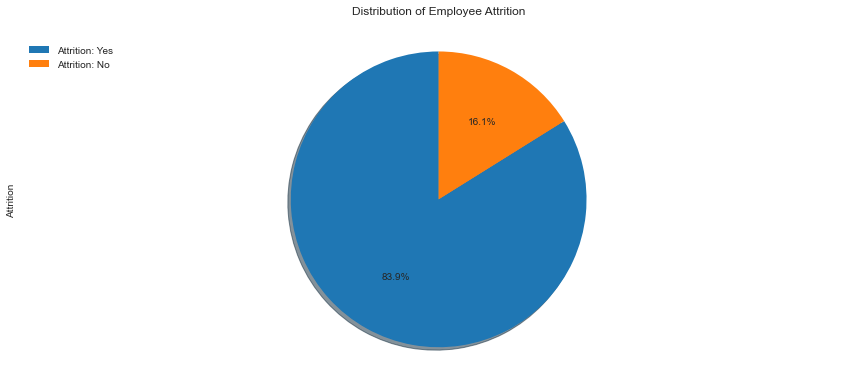

In [9]:
# Exploratory data visualization

labels = 'Attrition: Yes','Attrition: No'
data['Attrition'].astype(str).value_counts().plot(kind='pie', figsize=(15, 6), autopct='%1.1f%%', startangle=90,    
                            shadow=True, labels=None)

plt.title('Distribution of Employee Attrition', y=1.05) 
plt.axis('equal')

# Add legend
plt.legend(labels=labels, loc='upper left') 

# Show plot
plt.savefig('images/Distribution of Employee Attrition')
plt.show()

In [10]:
# Data visualization
# Demographic-related features: Gender, MaritalStatus, JobRole

def categorical_column_viz(col_name):
    
    f,ax = plt.subplots(1,2, figsize=(10,5))
  
    # Count plot
    data[col_name].value_counts().plot.bar(cmap='Set3',ax=ax[0])
    ax[0].set_title(f'Number of Employee by {col_name}')
    ax[0].set_xlabel(f'{col_name}')
    ax[0].set_ylabel('Count')
 
    # Attrition count per factors
    g2 = sns.countplot(col_name, hue='Attrition',data=data, ax=ax[1], palette='Set3')
    ax[1].set_title(f'Attrition by {col_name}')
    ax[1].set_xlabel(f'{col_name}')
    ax[1].set_ylabel('Count')
    g2.set_xticklabels(g2.get_xticklabels(), rotation=90) 

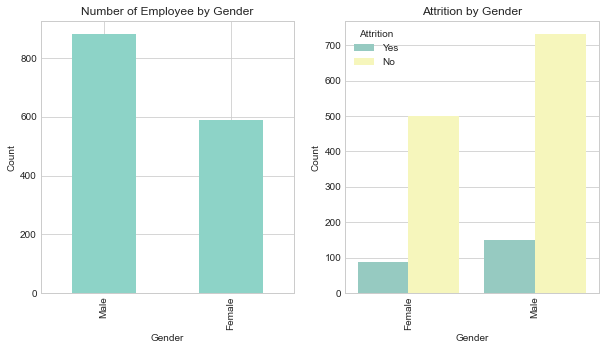

In [11]:
categorical_column_viz('Gender')
plt.savefig('images/Attrition by Gender')

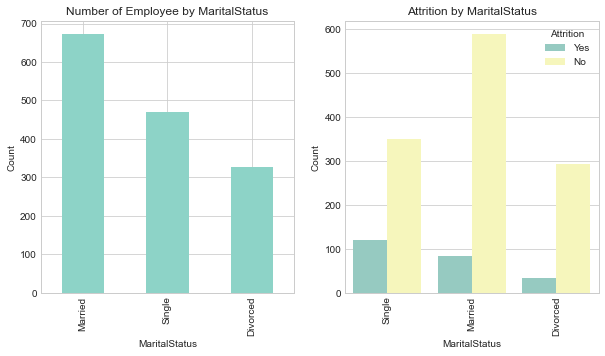

In [12]:
categorical_column_viz('MaritalStatus')
plt.savefig('images/Attrition by Marital Status')

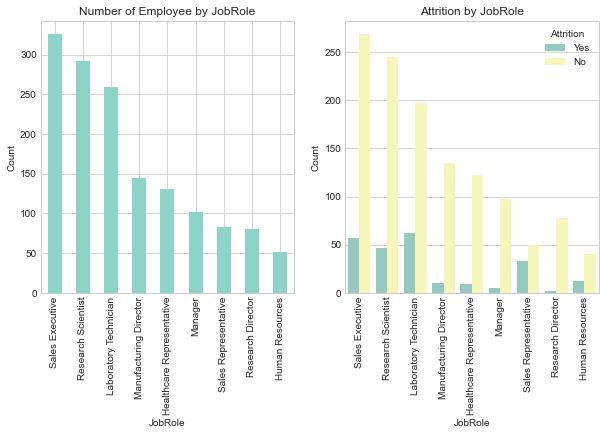

In [13]:
categorical_column_viz('JobRole')
plt.savefig('images/Attrition by Job Role')

In [14]:
# Data visualization
# Employee ratings related features: JobSatisfaction, EnvironmentSatisfaction, RelationshipSatisfaction, WorkLifeBalance

def categorical_column_viz(col_name):
    
    f,ax = plt.subplots(1,2, figsize=(10,5))
  
    # Count plot
    data[col_name].value_counts().plot.bar(cmap='Set2',ax=ax[0])
    ax[0].set_title(f'Employee Rating on {col_name}')
    ax[0].set_xlabel(f'{col_name}')
    ax[0].set_ylabel('Count')
    ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation = 0)
 
    # Attrition count per factors
    g2 = sns.countplot(col_name, hue='Attrition',data=data, ax=ax[1], palette='Set2')
    ax[1].set_title(f'Attrition by Rating on {col_name}')
    ax[1].set_xlabel(f'{col_name}')
    ax[1].set_ylabel('Count')
    g2.set_xticklabels(g2.get_xticklabels()) 

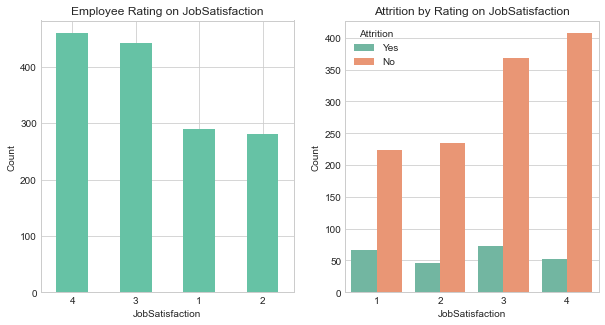

In [15]:
categorical_column_viz('JobSatisfaction')
plt.savefig('images/Attrition by Rating on JobS atisfaction')

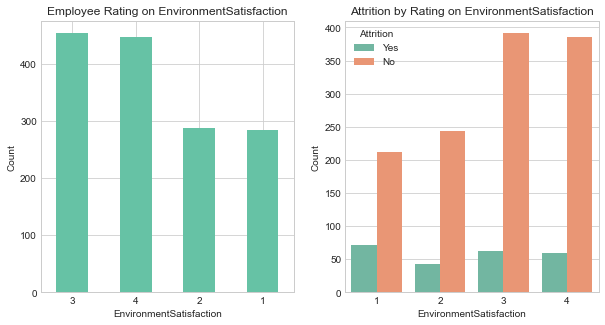

In [16]:
categorical_column_viz('EnvironmentSatisfaction')
plt.savefig('images/Attrition by Rating on Environment Satisfaction')

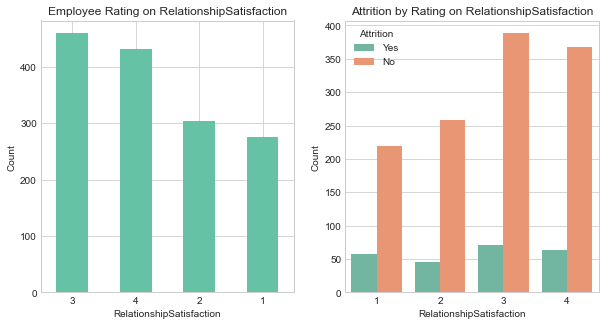

In [17]:
categorical_column_viz('RelationshipSatisfaction')
plt.savefig('images/Attrition by Rating on Relationship Satisfaction')

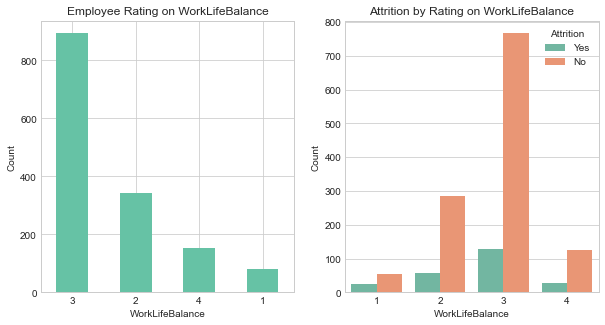

In [18]:
categorical_column_viz('WorkLifeBalance')
plt.savefig('images/Attrition by Rating on Work-Life Balance')

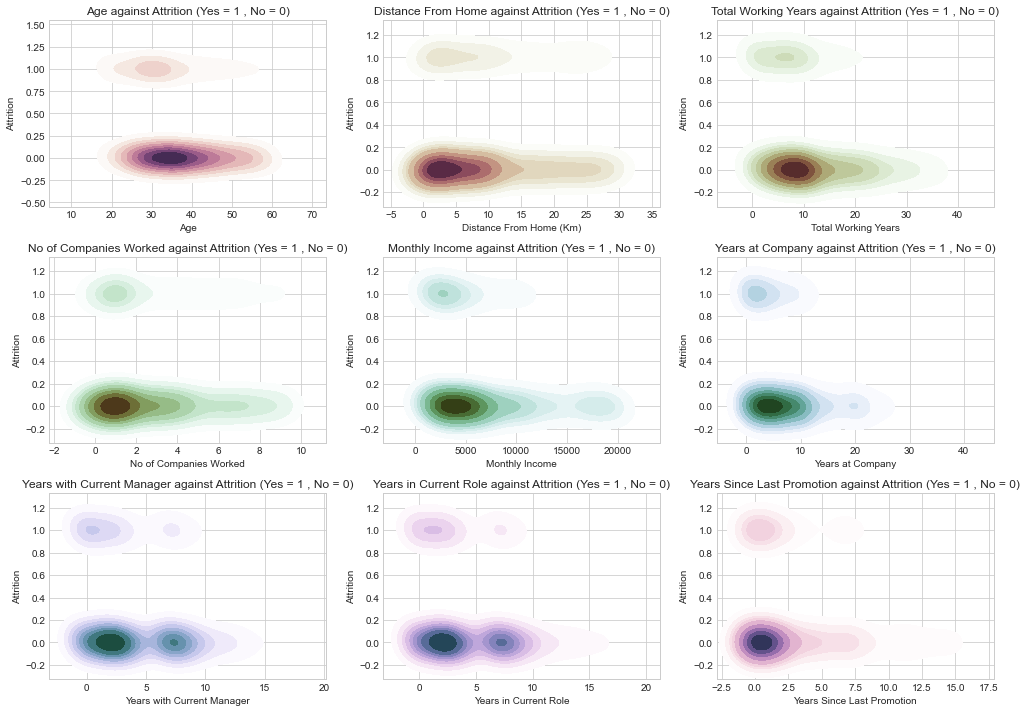

In [19]:
# Visualization of numerical features

data['Attrition'] = data['Attrition'].apply(lambda x:1 if x == "Yes" else 0 )

f, axes = plt.subplots(3, 3, figsize=(14, 10), sharex=False, sharey=False)

# Define colormap scheme
cmap = sns.cubehelix_palette(start=0.0, light=1, as_cmap=True)

# Generate and plot
x = data['Age'].values
y = data['Attrition'].values
sns.kdeplot(x, y, cmap=cmap, shade=True, cut=5, ax=axes[0,0])
axes[0,0].set( title = 'Age against Attrition (Yes = 1 , No = 0)')
axes[0,0].set_xlabel('Age')
axes[0,0].set_ylabel('Attrition')

cmap = sns.cubehelix_palette(start=0.333333333333, light=1, as_cmap=True)
x = data['DistanceFromHome'].values
y = data['Attrition'].values
sns.kdeplot(x, y, cmap=cmap, shade=True, ax=axes[0,1])
axes[0,1].set( title = 'Distance From Home against Attrition (Yes = 1 , No = 0)')
axes[0,1].set_xlabel('Distance From Home (Km)')
axes[0,1].set_ylabel('Attrition')

cmap = sns.cubehelix_palette(start=0.666666666667, light=1, as_cmap=True)
x = data['TotalWorkingYears'].values
y = data['Attrition'].values
sns.kdeplot(x, y, cmap=cmap, shade=True, ax=axes[0,2])
axes[0,2].set( title = 'Total Working Years against Attrition (Yes = 1 , No = 0)')
axes[0,2].set_xlabel('Total Working Years')
axes[0,2].set_ylabel('Attrition')

cmap = sns.cubehelix_palette(start=1.0, light=1, as_cmap=True)
x = data['NumCompaniesWorked'].values
y = data['Attrition'].values
sns.kdeplot(x, y, cmap=cmap, shade=True,  ax=axes[1,0])
axes[1,0].set( title = 'No of Companies Worked against Attrition (Yes = 1 , No = 0)')
axes[1,0].set_xlabel('No of Companies Worked')
axes[1,0].set_ylabel('Attrition')

cmap = sns.cubehelix_palette(start=1.333333333333, light=1, as_cmap=True)
x = data['MonthlyIncome'].values
y = data['Attrition'].values
sns.kdeplot(x, y, cmap=cmap, shade=True,  ax=axes[1,1])
axes[1,1].set( title = 'Monthly Income against Attrition (Yes = 1 , No = 0)')
axes[1,1].set_xlabel('Monthly Income')
axes[1,1].set_ylabel('Attrition')

cmap = sns.cubehelix_palette(start=1.666666666667, light=1, as_cmap=True)
x = data['YearsAtCompany'].values
y = data['Attrition'].values
sns.kdeplot(x, y, cmap=cmap, shade=True,  ax=axes[1,2])
axes[1,2].set( title = 'Years at Company against Attrition (Yes = 1 , No = 0)')
axes[1,2].set_xlabel('Years at Company')
axes[1,2].set_ylabel('Attrition')

cmap = sns.cubehelix_palette(start=2.0, light=1, as_cmap=True)
x = data['YearsWithCurrManager'].values
y = data['Attrition'].values
sns.kdeplot(x, y, cmap=cmap, shade=True,  ax=axes[2,0])
axes[2,0].set( title = 'Years with Current Manager against Attrition (Yes = 1 , No = 0)')
axes[2,0].set_xlabel('Years with Current Manager')
axes[2,0].set_ylabel('Attrition')

cmap = sns.cubehelix_palette(start=2.333333333333, light=1, as_cmap=True)
x = data['YearsInCurrentRole'].values
y = data['Attrition'].values
sns.kdeplot(x, y, cmap=cmap, shade=True,  ax=axes[2,1])
axes[2,1].set( title = 'Years in Current Role against Attrition (Yes = 1 , No = 0)')
axes[2,1].set_xlabel('Years in Current Role')
axes[2,1].set_ylabel('Attrition')

cmap = sns.cubehelix_palette(start=2.666666666667, light=1, as_cmap=True)
x = data['YearsSinceLastPromotion'].values
y = data['Attrition'].values
sns.kdeplot(x, y, cmap=cmap, shade=True,  ax=axes[2,2])
axes[2,2].set( title = 'Years Since Last Promotion against Attrition (Yes = 1 , No = 0)')
axes[2,2].set_xlabel('Years Since Last Promotion')
axes[2,2].set_ylabel('Attrition')

f.tight_layout()
plt.savefig('images/Numerical Features against Attrition')

In [20]:
#Feature engineering
#Label encoding categorial data

le = preprocessing.LabelEncoder()
categorial_variables = ['Attrition','Gender','MaritalStatus','JobRole']
for i in categorial_variables:
    data[i] = le.fit_transform(data[i])
data.to_csv('datasets/Copy.csv')
data.head(5)

Attrition  Age  Gender  MaritalStatus  DistanceFromHome  TotalWorkingYears  \
0          1   41       0              2                 1                  8   
1          0   49       1              1                 8                 10   
2          1   37       1              2                 2                  7   
3          0   33       0              1                 3                  8   
4          0   27       1              1                 2                  6   

   NumCompaniesWorked  MonthlyIncome  JobRole  YearsAtCompany  \
0                   8           5993        7               6   
1                   1           5130        6              10   
2                   6           2090        2               0   
3                   1           2909        6               8   
4                   9           3468        2               2   

   YearsWithCurrManager  YearsInCurrentRole  YearsSinceLastPromotion  \
0                     5                   4                        0   
1                     7                   7                        1   
2                     0                   0                        0   
3                     0                   7                        3   
4                     2                   2                        2   

   JobSatisfaction  EnvironmentSatisfaction  RelationshipSatisfaction  \
0                4                        2                         1   
1                2                        3                         4   
2                3                        4                         2   
3                3                        4                         3   
4                2                        1                         4   

   WorkLifeBalance  
0                1  
1                3  
2                3  
3                3  
4                3

In [21]:
target = data['Attrition']
train = data.drop('Attrition',axis = 1)
train.shape

(1470, 16)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(train,target,test_size=0.30,random_state=42)

In [23]:
print(f"Train Dataset Shape: {X_train.shape} , Test Dataset Shape: {X_test.shape}")

Train Dataset Shape: (1029, 16) , Test Dataset Shape: (441, 16)


In [24]:
# Function that runs the requested algorithm and returns the accuracy metrics
def fit_ml_algo(algo, X_train,y_train, cv):
    
    # One pass
    model = algo.fit(X_train, y_train)
    acc = round(model.score(X_train, y_train) * 100, 2)
    
    # 10-Fold Cross Validation 
    train_pred = model_selection.cross_val_predict(algo,X_train,y_train,cv=cv,n_jobs = -1)
    
    # 10-Fold Cross Validation accuracy metric
    acc_cv = round(metrics.accuracy_score(y_train, train_pred) * 100, 2)
    
    return train_pred, acc, acc_cv

In [25]:
# Logistic Regression

train_pred_log, acc_log, acc_cv_log = fit_ml_algo(LogisticRegression(), X_train,y_train, 10)
print("Training Accuracy: %s" % acc_log)
print("Validation Accuracy: %s" % acc_cv_log)

Training Accuracy: 83.67
Validation Accuracy: 83.87


In [29]:
# Cross validation accuracy metric

model = LogisticRegression().fit(X_train, y_train)
score = round(metrics.accuracy_score(y_test, model.predict(X_test)) * 100, 2)
print("Accuracy: %s" % score)
print(classification_report(y_test, model.predict(X_test)))

Accuracy: 84.35
              precision    recall  f1-score   support

           0       0.86      0.97      0.91       380
           1       0.21      0.05      0.08        61

    accuracy                           0.84       441
   macro avg       0.54      0.51      0.50       441
weighted avg       0.77      0.84      0.80       441



In [30]:
# SVM

train_pred_svc, acc_svc, acc_cv_svc = fit_ml_algo(SVC(),X_train,y_train,10)
print("Training Accuracy: %s" % acc_svc)
print("Validation Accuracy: %s" % acc_cv_svc)

Training Accuracy: 82.9
Validation Accuracy: 82.9


In [31]:
model = SVC().fit(X_train, y_train)
score = round(metrics.accuracy_score(y_test, model.predict(X_test)) * 100, 2)
print("Accuracy: %s" % score)
print(classification_report(y_test, model.predict(X_test)))

Accuracy: 86.17
              precision    recall  f1-score   support

           0       0.86      1.00      0.93       380
           1       0.00      0.00      0.00        61

    accuracy                           0.86       441
   macro avg       0.43      0.50      0.46       441
weighted avg       0.74      0.86      0.80       441



In [32]:
# Linear SVC

train_pred_svc, acc_linear_svc, acc_cv_linear_svc = fit_ml_algo(LinearSVC(),X_train, y_train,10)
print("Training Accuracy: %s" % acc_linear_svc)
print("Validation Accuracy: %s" % acc_cv_linear_svc)

Training Accuracy: 83.48
Validation Accuracy: 70.07


In [33]:
model = LinearSVC().fit(X_train, y_train)
score = round(metrics.accuracy_score(y_test, model.predict(X_test)) * 100, 2)
print("Accuracy: %s" % score)
print(classification_report(y_test, model.predict(X_test)))

Accuracy: 14.06
              precision    recall  f1-score   support

           0       1.00      0.00      0.01       380
           1       0.14      1.00      0.24        61

    accuracy                           0.14       441
   macro avg       0.57      0.50      0.12       441
weighted avg       0.88      0.14      0.04       441



In [34]:
# K Nearest Neighbour

train_pred_knn, acc_knn, acc_cv_knn = fit_ml_algo(KNeighborsClassifier(n_neighbors = 3),X_train,y_train,10)
print("Training Accuracy: %s" % acc_knn)
print("Validation Accuracy: %s" % acc_cv_knn)

Training Accuracy: 86.2
Validation Accuracy: 79.69


In [35]:
model = KNeighborsClassifier(n_neighbors = 3).fit(X_train, y_train)
score = round(metrics.accuracy_score(y_test, model.predict(X_test)) * 100, 2)
print("Accuracy: %s" % score)
print(classification_report(y_test, model.predict(X_test)))

Accuracy: 82.31
              precision    recall  f1-score   support

           0       0.87      0.93      0.90       380
           1       0.24      0.13      0.17        61

    accuracy                           0.82       441
   macro avg       0.56      0.53      0.54       441
weighted avg       0.78      0.82      0.80       441



In [36]:
# Gaussian Naive Bayes

train_pred_gaussian, acc_gaussian, acc_cv_gaussian = fit_ml_algo(GaussianNB(),X_train,y_train,10)
print("Training Accuracy: %s" % acc_gaussian)
print("Validation Accuracy: %s" % acc_cv_gaussian)

Training Accuracy: 76.19
Validation Accuracy: 74.93


In [37]:
model = GaussianNB().fit(X_train, y_train)
score = round(metrics.accuracy_score(y_test, model.predict(X_test)) * 100, 2)
print("Accuracy: %s" % score)
print(classification_report(y_test, model.predict(X_test)))

Accuracy: 72.11
              precision    recall  f1-score   support

           0       0.89      0.77      0.83       380
           1       0.22      0.41      0.29        61

    accuracy                           0.72       441
   macro avg       0.56      0.59      0.56       441
weighted avg       0.80      0.72      0.75       441



In [38]:
# Perceptron

train_pred_gaussian, acc_perceptron, acc_cv_perceptron = fit_ml_algo(Perceptron(),X_train,y_train,10)
print("Training Accuracy: %s" % acc_perceptron)
print("Validation Accuracy: %s" % acc_cv_perceptron)

Training Accuracy: 82.9
Validation Accuracy: 76.38


In [39]:
model = Perceptron().fit(X_train, y_train)
score = round(metrics.accuracy_score(y_test, model.predict(X_test)) * 100, 2)
print("Accuracy: %s" % score)
print(classification_report(y_test, model.predict(X_test)))

Accuracy: 86.17
              precision    recall  f1-score   support

           0       0.86      1.00      0.93       380
           1       0.00      0.00      0.00        61

    accuracy                           0.86       441
   macro avg       0.43      0.50      0.46       441
weighted avg       0.74      0.86      0.80       441



In [40]:
# Stochastic Gradient Descent

train_pred_sgd, acc_sgd, acc_cv_sgd = fit_ml_algo(SGDClassifier(),X_train, y_train,10)
print("Training Accuracy: %s" % acc_sgd)
print("Validation Accuracy: %s" % acc_cv_sgd)

Training Accuracy: 82.99
Validation Accuracy: 79.79


In [43]:
model = SGDClassifier().fit(X_train, y_train)
score = round(metrics.accuracy_score(y_test, model.predict(X_test)) * 100, 2)
print("Accuracy: %s" % score)
print(classification_report(y_test, model.predict(X_test)))

Accuracy: 86.17
              precision    recall  f1-score   support

           0       0.86      1.00      0.93       380
           1       0.00      0.00      0.00        61

    accuracy                           0.86       441
   macro avg       0.43      0.50      0.46       441
weighted avg       0.74      0.86      0.80       441



In [44]:
# Decision Tree

train_pred_dt, acc_dt, acc_cv_dt = fit_ml_algo(DecisionTreeClassifier(),X_train, y_train,10)
print("Training Accuracy: %s" % acc_dt)
print("Validation Accuracy: %s" % acc_cv_dt)

Training Accuracy: 100.0
Validation Accuracy: 75.41


In [45]:
model = DecisionTreeClassifier().fit(X_train, y_train)
score = round(metrics.accuracy_score(y_test, model.predict(X_test)) * 100, 2)
print("Accuracy: %s" % score)
print(classification_report(y_test, model.predict(X_test)))

Accuracy: 78.46
              precision    recall  f1-score   support

           0       0.88      0.87      0.87       380
           1       0.25      0.28      0.26        61

    accuracy                           0.78       441
   macro avg       0.57      0.57      0.57       441
weighted avg       0.79      0.78      0.79       441



In [33]:
# Gradient Boosting Trees

train_pred_gbt, acc_gbt, acc_cv_gbt = fit_ml_algo(GradientBoostingClassifier(),X_train, y_train,10)
print("Training Accuracy: %s" % acc_gbt)
print("Validation Accuracy: %s" % acc_cv_gbt)

Training Accuracy: 93.39
Validation Accuracy: 84.45


In [34]:
# Random Forest

train_pred_dt, acc_rf, acc_cv_rf = fit_ml_algo(RandomForestClassifier(n_estimators=100),X_train, y_train,10)
print("Training Accuracy: %s" % acc_rf)
print("Validation Accuracy: %s" % acc_cv_rf)

Training Accuracy: 100.0
Validation Accuracy: 85.03


In [35]:
# Neural Network (Multi-layer Perceptron)

train_pred_nn, acc_nn, acc_cv_nn = fit_ml_algo(MLPClassifier(max_iter=1500),X_train, y_train,10)
print("Training Accuracy: %s" % acc_nn)
print("Validation Accuracy: %s" % acc_cv_nn)

Training Accuracy: 82.9
Validation Accuracy: 57.24


In [46]:
# CatBoost Classifier
# Define the categorical features for the CatBoost model

cat_features = np.where(X_train.dtypes != np.float)[0]
cat_features

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15],
      dtype=int64)

In [47]:
# Pool training data and categorical feature labels together
train_pool = Pool(X_train, y_train, cat_features)  

In [48]:
# CatBoost
catboost_model = CatBoostClassifier(iterations=1000,custom_loss=['Accuracy'],loss_function='Logloss')

# Fit CatBoost model
catboost_model.fit(train_pool,plot=True)

# CatBoost accuracy
acc_catboost = round(catboost_model.score(X_train, y_train) * 100, 2)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.010429
0:	learn: 0.6851494	total: 198ms	remaining: 3m 17s
1:	learn: 0.6790223	total: 236ms	remaining: 1m 57s
2:	learn: 0.6739165	total: 243ms	remaining: 1m 20s
3:	learn: 0.6676504	total: 271ms	remaining: 1m 7s
4:	learn: 0.6627776	total: 280ms	remaining: 55.8s
5:	learn: 0.6579193	total: 289ms	remaining: 47.9s
6:	learn: 0.6532834	total: 297ms	remaining: 42.2s
7:	learn: 0.6487483	total: 303ms	remaining: 37.5s
8:	learn: 0.6442824	total: 312ms	remaining: 34.4s
9:	learn: 0.6384844	total: 343ms	remaining: 34s
10:	learn: 0.6342675	total: 349ms	remaining: 31.4s
11:	learn: 0.6284711	total: 382ms	remaining: 31.4s
12:	learn: 0.6243363	total: 397ms	remaining: 30.1s
13:	learn: 0.6195764	total: 428ms	remaining: 30.1s
14:	learn: 0.6157457	total: 439ms	remaining: 28.8s
15:	learn: 0.6120117	total: 444ms	remaining: 27.3s
16:	learn: 0.6067710	total: 475ms	remaining: 27.5s
17:	learn: 0.6027703	total: 490ms	remaining: 26.7s
18:	learn: 0.5989892	total: 505ms	remaining: 26.1s
19:	learn:

165:	learn: 0.3758721	total: 4.94s	remaining: 24.8s
166:	learn: 0.3753601	total: 4.97s	remaining: 24.8s
167:	learn: 0.3748883	total: 5.03s	remaining: 24.9s
168:	learn: 0.3746629	total: 5.07s	remaining: 24.9s
169:	learn: 0.3741082	total: 5.09s	remaining: 24.9s
170:	learn: 0.3736120	total: 5.13s	remaining: 24.9s
171:	learn: 0.3730518	total: 5.17s	remaining: 24.9s
172:	learn: 0.3727541	total: 5.21s	remaining: 24.9s
173:	learn: 0.3721132	total: 5.24s	remaining: 24.9s
174:	learn: 0.3717438	total: 5.27s	remaining: 24.9s
175:	learn: 0.3710111	total: 5.31s	remaining: 24.9s
176:	learn: 0.3702333	total: 5.34s	remaining: 24.8s
177:	learn: 0.3701066	total: 5.35s	remaining: 24.7s
178:	learn: 0.3696596	total: 5.39s	remaining: 24.7s
179:	learn: 0.3691014	total: 5.42s	remaining: 24.7s
180:	learn: 0.3685601	total: 5.45s	remaining: 24.7s
181:	learn: 0.3679879	total: 5.48s	remaining: 24.6s
182:	learn: 0.3673582	total: 5.5s	remaining: 24.6s
183:	learn: 0.3669679	total: 5.53s	remaining: 24.5s
184:	learn: 0

328:	learn: 0.3128650	total: 10.1s	remaining: 20.6s
329:	learn: 0.3126635	total: 10.2s	remaining: 20.6s
330:	learn: 0.3126447	total: 10.2s	remaining: 20.6s
331:	learn: 0.3123002	total: 10.2s	remaining: 20.5s
332:	learn: 0.3121923	total: 10.2s	remaining: 20.5s
333:	learn: 0.3118779	total: 10.3s	remaining: 20.5s
334:	learn: 0.3114949	total: 10.3s	remaining: 20.4s
335:	learn: 0.3111512	total: 10.3s	remaining: 20.4s
336:	learn: 0.3107885	total: 10.4s	remaining: 20.4s
337:	learn: 0.3102831	total: 10.4s	remaining: 20.3s
338:	learn: 0.3099696	total: 10.4s	remaining: 20.3s
339:	learn: 0.3095197	total: 10.5s	remaining: 20.3s
340:	learn: 0.3091318	total: 10.5s	remaining: 20.3s
341:	learn: 0.3088217	total: 10.5s	remaining: 20.2s
342:	learn: 0.3086180	total: 10.6s	remaining: 20.2s
343:	learn: 0.3080120	total: 10.6s	remaining: 20.2s
344:	learn: 0.3079125	total: 10.6s	remaining: 20.2s
345:	learn: 0.3075761	total: 10.7s	remaining: 20.2s
346:	learn: 0.3075423	total: 10.7s	remaining: 20.1s
347:	learn: 

493:	learn: 0.2714353	total: 15.8s	remaining: 16.2s
494:	learn: 0.2713437	total: 15.8s	remaining: 16.1s
495:	learn: 0.2711040	total: 15.9s	remaining: 16.1s
496:	learn: 0.2709459	total: 15.9s	remaining: 16.1s
497:	learn: 0.2705696	total: 15.9s	remaining: 16s
498:	learn: 0.2703571	total: 15.9s	remaining: 16s
499:	learn: 0.2702872	total: 16s	remaining: 16s
500:	learn: 0.2702252	total: 16s	remaining: 15.9s
501:	learn: 0.2699365	total: 16s	remaining: 15.9s
502:	learn: 0.2697870	total: 16.1s	remaining: 15.9s
503:	learn: 0.2695631	total: 16.1s	remaining: 15.8s
504:	learn: 0.2695097	total: 16.1s	remaining: 15.8s
505:	learn: 0.2692539	total: 16.1s	remaining: 15.8s
506:	learn: 0.2690591	total: 16.2s	remaining: 15.7s
507:	learn: 0.2687523	total: 16.2s	remaining: 15.7s
508:	learn: 0.2684344	total: 16.3s	remaining: 15.7s
509:	learn: 0.2682897	total: 16.3s	remaining: 15.6s
510:	learn: 0.2681022	total: 16.3s	remaining: 15.6s
511:	learn: 0.2677002	total: 16.3s	remaining: 15.6s
512:	learn: 0.2674244	to

652:	learn: 0.2416006	total: 20.7s	remaining: 11s
653:	learn: 0.2414612	total: 20.8s	remaining: 11s
654:	learn: 0.2414179	total: 20.8s	remaining: 10.9s
655:	learn: 0.2414167	total: 20.8s	remaining: 10.9s
656:	learn: 0.2410536	total: 20.8s	remaining: 10.9s
657:	learn: 0.2407515	total: 20.9s	remaining: 10.8s
658:	learn: 0.2405743	total: 20.9s	remaining: 10.8s
659:	learn: 0.2404260	total: 20.9s	remaining: 10.8s
660:	learn: 0.2401093	total: 21s	remaining: 10.8s
661:	learn: 0.2399984	total: 21s	remaining: 10.7s
662:	learn: 0.2398506	total: 21s	remaining: 10.7s
663:	learn: 0.2397489	total: 21.1s	remaining: 10.7s
664:	learn: 0.2396933	total: 21.1s	remaining: 10.6s
665:	learn: 0.2396653	total: 21.1s	remaining: 10.6s
666:	learn: 0.2393943	total: 21.2s	remaining: 10.6s
667:	learn: 0.2392982	total: 21.2s	remaining: 10.5s
668:	learn: 0.2392558	total: 21.2s	remaining: 10.5s
669:	learn: 0.2392019	total: 21.3s	remaining: 10.5s
670:	learn: 0.2390961	total: 21.3s	remaining: 10.4s
671:	learn: 0.2390419	

814:	learn: 0.2163856	total: 26.3s	remaining: 5.98s
815:	learn: 0.2161110	total: 26.4s	remaining: 5.95s
816:	learn: 0.2160914	total: 26.4s	remaining: 5.91s
817:	learn: 0.2159706	total: 26.4s	remaining: 5.88s
818:	learn: 0.2157759	total: 26.5s	remaining: 5.85s
819:	learn: 0.2157372	total: 26.5s	remaining: 5.81s
820:	learn: 0.2155923	total: 26.5s	remaining: 5.78s
821:	learn: 0.2155260	total: 26.5s	remaining: 5.75s
822:	learn: 0.2153366	total: 26.6s	remaining: 5.72s
823:	learn: 0.2153242	total: 26.6s	remaining: 5.69s
824:	learn: 0.2152039	total: 26.7s	remaining: 5.66s
825:	learn: 0.2150299	total: 26.7s	remaining: 5.62s
826:	learn: 0.2149717	total: 26.7s	remaining: 5.59s
827:	learn: 0.2149073	total: 26.8s	remaining: 5.56s
828:	learn: 0.2148946	total: 26.8s	remaining: 5.53s
829:	learn: 0.2147856	total: 26.8s	remaining: 5.49s
830:	learn: 0.2147018	total: 26.8s	remaining: 5.46s
831:	learn: 0.2145227	total: 26.9s	remaining: 5.43s
832:	learn: 0.2144919	total: 26.9s	remaining: 5.39s
833:	learn: 

978:	learn: 0.1952265	total: 31.8s	remaining: 683ms
979:	learn: 0.1950913	total: 31.9s	remaining: 651ms
980:	learn: 0.1948917	total: 31.9s	remaining: 618ms
981:	learn: 0.1948577	total: 32s	remaining: 586ms
982:	learn: 0.1947455	total: 32s	remaining: 553ms
983:	learn: 0.1946446	total: 32s	remaining: 521ms
984:	learn: 0.1946119	total: 32.1s	remaining: 488ms
985:	learn: 0.1944491	total: 32.1s	remaining: 456ms
986:	learn: 0.1943976	total: 32.1s	remaining: 423ms
987:	learn: 0.1941597	total: 32.1s	remaining: 390ms
988:	learn: 0.1940752	total: 32.2s	remaining: 358ms
989:	learn: 0.1938951	total: 32.2s	remaining: 325ms
990:	learn: 0.1938360	total: 32.3s	remaining: 293ms
991:	learn: 0.1937082	total: 32.3s	remaining: 260ms
992:	learn: 0.1935125	total: 32.3s	remaining: 228ms
993:	learn: 0.1933508	total: 32.4s	remaining: 195ms
994:	learn: 0.1933076	total: 32.4s	remaining: 163ms
995:	learn: 0.1932195	total: 32.4s	remaining: 130ms
996:	learn: 0.1931385	total: 32.4s	remaining: 97.6ms
997:	learn: 0.192

In [49]:
# Set parameters for cross validation as same as initial model
cv_params = catboost_model.get_params()

# 10-Fold Cross Validation
cv_data = cv(train_pool,cv_params,fold_count=10,plot=True)

# 10-Fold Cross Validation accuracy metric
acc_cv_catboost = round(np.max(cv_data['test-Accuracy-mean']) * 100, 2)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.6757336	test: 0.6760505	best: 0.6760505 (0)
1:	learn: 0.6605570	test: 0.6611787	best: 0.6611787 (1)
2:	learn: 0.6451688	test: 0.6455889	best: 0.6455889 (2)
3:	learn: 0.6309249	test: 0.6317550	best: 0.6317550 (3)
4:	learn: 0.6176238	test: 0.6191908	best: 0.6191908 (4)
5:	learn: 0.6060618	test: 0.6078350	best: 0.6078350 (5)
6:	learn: 0.5945687	test: 0.5964804	best: 0.5964804 (6)
7:	learn: 0.5835436	test: 0.5856405	best: 0.5856405 (7)
8:	learn: 0.5726350	test: 0.5748806	best: 0.5748806 (8)
9:	learn: 0.5628308	test: 0.5650950	best: 0.5650950 (9)
10:	learn: 0.5531669	test: 0.5555611	best: 0.5555611 (10)
11:	learn: 0.5446669	test: 0.5474128	best: 0.5474128 (11)
12:	learn: 0.5365319	test: 0.5396810	best: 0.5396810 (12)
13:	learn: 0.5288573	test: 0.5322712	best: 0.5322712 (13)
14:	learn: 0.5215569	test: 0.5253674	best: 0.5253674 (14)
15:	learn: 0.5144671	test: 0.5184025	best: 0.5184025 (15)
16:	learn: 0.5078581	test: 0.5122567	best: 0.5122567 (16)
17:	learn: 0.5014650	test: 0.50617

146:	learn: 0.2880606	test: 0.3916024	best: 0.3916024 (146)
147:	learn: 0.2873965	test: 0.3917141	best: 0.3916024 (146)
148:	learn: 0.2868379	test: 0.3916379	best: 0.3916024 (146)
149:	learn: 0.2861037	test: 0.3916388	best: 0.3916024 (146)
150:	learn: 0.2854020	test: 0.3913950	best: 0.3913950 (150)
151:	learn: 0.2847016	test: 0.3912226	best: 0.3912226 (151)
152:	learn: 0.2841582	test: 0.3910668	best: 0.3910668 (152)
153:	learn: 0.2834733	test: 0.3910064	best: 0.3910064 (153)
154:	learn: 0.2828537	test: 0.3910475	best: 0.3910064 (153)
155:	learn: 0.2822882	test: 0.3909856	best: 0.3909856 (155)
156:	learn: 0.2815318	test: 0.3906218	best: 0.3906218 (156)
157:	learn: 0.2808043	test: 0.3907152	best: 0.3906218 (156)
158:	learn: 0.2802172	test: 0.3905736	best: 0.3905736 (158)
159:	learn: 0.2796765	test: 0.3905064	best: 0.3905064 (159)
160:	learn: 0.2790265	test: 0.3904447	best: 0.3904447 (160)
161:	learn: 0.2783189	test: 0.3904122	best: 0.3904122 (161)
162:	learn: 0.2775946	test: 0.3903457	be

284:	learn: 0.2125708	test: 0.3883704	best: 0.3878979 (207)
285:	learn: 0.2121995	test: 0.3884027	best: 0.3878979 (207)
286:	learn: 0.2117149	test: 0.3885087	best: 0.3878979 (207)
287:	learn: 0.2113331	test: 0.3885057	best: 0.3878979 (207)	total: 1m 50s	remaining: 4m 33s
288:	learn: 0.2108518	test: 0.3886518	best: 0.3878979 (207)
289:	learn: 0.2103217	test: 0.3888831	best: 0.3878979 (207)
290:	learn: 0.2100368	test: 0.3889329	best: 0.3878979 (207)
291:	learn: 0.2096284	test: 0.3891443	best: 0.3878979 (207)
292:	learn: 0.2092461	test: 0.3893042	best: 0.3878979 (207)
293:	learn: 0.2089113	test: 0.3891584	best: 0.3878979 (207)
294:	learn: 0.2086411	test: 0.3892366	best: 0.3878979 (207)
295:	learn: 0.2082511	test: 0.3892140	best: 0.3878979 (207)
296:	learn: 0.2078338	test: 0.3890609	best: 0.3878979 (207)	total: 1m 55s	remaining: 4m 32s
297:	learn: 0.2075082	test: 0.3889690	best: 0.3878979 (207)
298:	learn: 0.2072557	test: 0.3890585	best: 0.3878979 (207)
299:	learn: 0.2068152	test: 0.388958

419:	learn: 0.1674899	test: 0.3881205	best: 0.3876821 (369)
420:	learn: 0.1670323	test: 0.3882928	best: 0.3876821 (369)
421:	learn: 0.1666822	test: 0.3883314	best: 0.3876821 (369)
422:	learn: 0.1664642	test: 0.3883632	best: 0.3876821 (369)
423:	learn: 0.1662467	test: 0.3883842	best: 0.3876821 (369)
424:	learn: 0.1659004	test: 0.3884988	best: 0.3876821 (369)
425:	learn: 0.1655538	test: 0.3886651	best: 0.3876821 (369)
426:	learn: 0.1651957	test: 0.3887199	best: 0.3876821 (369)
427:	learn: 0.1649069	test: 0.3885356	best: 0.3876821 (369)
428:	learn: 0.1646274	test: 0.3886096	best: 0.3876821 (369)
429:	learn: 0.1643992	test: 0.3886351	best: 0.3876821 (369)
430:	learn: 0.1641185	test: 0.3884642	best: 0.3876821 (369)
431:	learn: 0.1638849	test: 0.3884767	best: 0.3876821 (369)
432:	learn: 0.1635962	test: 0.3883511	best: 0.3876821 (369)
433:	learn: 0.1633600	test: 0.3882632	best: 0.3876821 (369)
434:	learn: 0.1631107	test: 0.3883413	best: 0.3876821 (369)
435:	learn: 0.1627391	test: 0.3884479	be

553:	learn: 0.1334670	test: 0.3903525	best: 0.3876821 (369)
554:	learn: 0.1332576	test: 0.3903084	best: 0.3876821 (369)
555:	learn: 0.1330916	test: 0.3904141	best: 0.3876821 (369)
556:	learn: 0.1329352	test: 0.3904520	best: 0.3876821 (369)
557:	learn: 0.1327748	test: 0.3904946	best: 0.3876821 (369)
558:	learn: 0.1325866	test: 0.3904592	best: 0.3876821 (369)
559:	learn: 0.1323967	test: 0.3904544	best: 0.3876821 (369)
560:	learn: 0.1321970	test: 0.3906129	best: 0.3876821 (369)
561:	learn: 0.1319705	test: 0.3905903	best: 0.3876821 (369)
562:	learn: 0.1317575	test: 0.3906534	best: 0.3876821 (369)
563:	learn: 0.1316134	test: 0.3906578	best: 0.3876821 (369)
564:	learn: 0.1313875	test: 0.3906569	best: 0.3876821 (369)
565:	learn: 0.1312230	test: 0.3908638	best: 0.3876821 (369)
566:	learn: 0.1310123	test: 0.3907624	best: 0.3876821 (369)
567:	learn: 0.1308067	test: 0.3906750	best: 0.3876821 (369)
568:	learn: 0.1306218	test: 0.3906229	best: 0.3876821 (369)
569:	learn: 0.1304637	test: 0.3907140	be

685:	learn: 0.1091961	test: 0.3938323	best: 0.3876821 (369)
686:	learn: 0.1090248	test: 0.3938624	best: 0.3876821 (369)
687:	learn: 0.1089168	test: 0.3939046	best: 0.3876821 (369)
688:	learn: 0.1087453	test: 0.3939282	best: 0.3876821 (369)
689:	learn: 0.1085997	test: 0.3939292	best: 0.3876821 (369)
690:	learn: 0.1084093	test: 0.3939957	best: 0.3876821 (369)
691:	learn: 0.1082473	test: 0.3940475	best: 0.3876821 (369)
692:	learn: 0.1080572	test: 0.3940027	best: 0.3876821 (369)
693:	learn: 0.1079476	test: 0.3939702	best: 0.3876821 (369)
694:	learn: 0.1077516	test: 0.3940608	best: 0.3876821 (369)
695:	learn: 0.1075630	test: 0.3940837	best: 0.3876821 (369)
696:	learn: 0.1074050	test: 0.3941691	best: 0.3876821 (369)
697:	learn: 0.1072598	test: 0.3942593	best: 0.3876821 (369)
698:	learn: 0.1069805	test: 0.3942561	best: 0.3876821 (369)
699:	learn: 0.1068812	test: 0.3943938	best: 0.3876821 (369)	total: 4m 59s	remaining: 2m 8s
700:	learn: 0.1067454	test: 0.3943847	best: 0.3876821 (369)
701:	lear

817:	learn: 0.0903394	test: 0.3985378	best: 0.3876821 (369)
818:	learn: 0.0902331	test: 0.3985462	best: 0.3876821 (369)
819:	learn: 0.0901390	test: 0.3985155	best: 0.3876821 (369)
820:	learn: 0.0900218	test: 0.3985573	best: 0.3876821 (369)
821:	learn: 0.0898876	test: 0.3985971	best: 0.3876821 (369)	total: 5m 55s	remaining: 1m 17s
822:	learn: 0.0897338	test: 0.3985258	best: 0.3876821 (369)
823:	learn: 0.0896259	test: 0.3984926	best: 0.3876821 (369)
824:	learn: 0.0894980	test: 0.3985389	best: 0.3876821 (369)
825:	learn: 0.0893867	test: 0.3985657	best: 0.3876821 (369)
826:	learn: 0.0892457	test: 0.3986023	best: 0.3876821 (369)
827:	learn: 0.0891324	test: 0.3985483	best: 0.3876821 (369)
828:	learn: 0.0890388	test: 0.3984857	best: 0.3876821 (369)
829:	learn: 0.0889110	test: 0.3984277	best: 0.3876821 (369)
830:	learn: 0.0887763	test: 0.3985218	best: 0.3876821 (369)
831:	learn: 0.0886295	test: 0.3986974	best: 0.3876821 (369)	total: 6m	remaining: 1m 12s
832:	learn: 0.0885138	test: 0.3986500	be

956:	learn: 0.0752192	test: 0.4045561	best: 0.3876821 (369)
957:	learn: 0.0751479	test: 0.4045535	best: 0.3876821 (369)
958:	learn: 0.0750379	test: 0.4045370	best: 0.3876821 (369)
959:	learn: 0.0749325	test: 0.4046378	best: 0.3876821 (369)
960:	learn: 0.0748123	test: 0.4046333	best: 0.3876821 (369)
961:	learn: 0.0747371	test: 0.4047116	best: 0.3876821 (369)
962:	learn: 0.0746431	test: 0.4048361	best: 0.3876821 (369)
963:	learn: 0.0745276	test: 0.4046847	best: 0.3876821 (369)
964:	learn: 0.0744468	test: 0.4046872	best: 0.3876821 (369)
965:	learn: 0.0743508	test: 0.4047271	best: 0.3876821 (369)
966:	learn: 0.0742609	test: 0.4048198	best: 0.3876821 (369)
967:	learn: 0.0741795	test: 0.4047631	best: 0.3876821 (369)
968:	learn: 0.0740647	test: 0.4049347	best: 0.3876821 (369)
969:	learn: 0.0739839	test: 0.4049063	best: 0.3876821 (369)
970:	learn: 0.0739076	test: 0.4049111	best: 0.3876821 (369)	total: 7m 2s	remaining: 12.6s
971:	learn: 0.0738232	test: 0.4047709	best: 0.3876821 (369)
972:	learn

In [50]:
model = CatBoostClassifier(iterations=1000,custom_loss=['Accuracy'],loss_function='Logloss').fit(X_train, y_train)

Learning rate set to 0.010429
0:	learn: 0.6861982	total: 5.95ms	remaining: 5.95s
1:	learn: 0.6801814	total: 11.6ms	remaining: 5.79s
2:	learn: 0.6727416	total: 16.5ms	remaining: 5.48s
3:	learn: 0.6660043	total: 19.8ms	remaining: 4.92s
4:	learn: 0.6592220	total: 22.7ms	remaining: 4.51s
5:	learn: 0.6522749	total: 25.2ms	remaining: 4.17s
6:	learn: 0.6452417	total: 27.8ms	remaining: 3.95s
7:	learn: 0.6389853	total: 30.5ms	remaining: 3.78s
8:	learn: 0.6332998	total: 33.3ms	remaining: 3.67s
9:	learn: 0.6274537	total: 35.5ms	remaining: 3.52s
10:	learn: 0.6218138	total: 38.2ms	remaining: 3.43s
11:	learn: 0.6159808	total: 40.9ms	remaining: 3.37s
12:	learn: 0.6093043	total: 43.7ms	remaining: 3.32s
13:	learn: 0.6045114	total: 46.9ms	remaining: 3.3s
14:	learn: 0.5991086	total: 50.2ms	remaining: 3.29s
15:	learn: 0.5938082	total: 52.9ms	remaining: 3.25s
16:	learn: 0.5892014	total: 55.4ms	remaining: 3.21s
17:	learn: 0.5843645	total: 58.1ms	remaining: 3.17s
18:	learn: 0.5802364	total: 60.7ms	remaining:

182:	learn: 0.3177567	total: 531ms	remaining: 2.37s
183:	learn: 0.3171380	total: 534ms	remaining: 2.37s
184:	learn: 0.3164978	total: 537ms	remaining: 2.37s
185:	learn: 0.3158369	total: 540ms	remaining: 2.37s
186:	learn: 0.3153729	total: 544ms	remaining: 2.36s
187:	learn: 0.3146584	total: 547ms	remaining: 2.36s
188:	learn: 0.3140849	total: 550ms	remaining: 2.36s
189:	learn: 0.3135619	total: 553ms	remaining: 2.36s
190:	learn: 0.3130502	total: 556ms	remaining: 2.36s
191:	learn: 0.3127624	total: 560ms	remaining: 2.35s
192:	learn: 0.3121514	total: 563ms	remaining: 2.35s
193:	learn: 0.3117863	total: 566ms	remaining: 2.35s
194:	learn: 0.3111062	total: 569ms	remaining: 2.35s
195:	learn: 0.3105940	total: 572ms	remaining: 2.35s
196:	learn: 0.3101805	total: 576ms	remaining: 2.35s
197:	learn: 0.3095875	total: 579ms	remaining: 2.34s
198:	learn: 0.3090959	total: 581ms	remaining: 2.34s
199:	learn: 0.3085911	total: 584ms	remaining: 2.33s
200:	learn: 0.3081695	total: 587ms	remaining: 2.33s
201:	learn: 

352:	learn: 0.2522160	total: 1.07s	remaining: 1.96s
353:	learn: 0.2517463	total: 1.07s	remaining: 1.96s
354:	learn: 0.2513936	total: 1.07s	remaining: 1.95s
355:	learn: 0.2512713	total: 1.08s	remaining: 1.95s
356:	learn: 0.2509494	total: 1.08s	remaining: 1.95s
357:	learn: 0.2506238	total: 1.08s	remaining: 1.94s
358:	learn: 0.2501492	total: 1.09s	remaining: 1.94s
359:	learn: 0.2497662	total: 1.09s	remaining: 1.94s
360:	learn: 0.2496135	total: 1.09s	remaining: 1.94s
361:	learn: 0.2494857	total: 1.1s	remaining: 1.93s
362:	learn: 0.2493454	total: 1.1s	remaining: 1.93s
363:	learn: 0.2491895	total: 1.1s	remaining: 1.93s
364:	learn: 0.2488065	total: 1.1s	remaining: 1.92s
365:	learn: 0.2485590	total: 1.11s	remaining: 1.92s
366:	learn: 0.2480203	total: 1.11s	remaining: 1.92s
367:	learn: 0.2477467	total: 1.11s	remaining: 1.91s
368:	learn: 0.2476620	total: 1.11s	remaining: 1.91s
369:	learn: 0.2473630	total: 1.12s	remaining: 1.91s
370:	learn: 0.2469861	total: 1.12s	remaining: 1.9s
371:	learn: 0.246

527:	learn: 0.2093038	total: 1.6s	remaining: 1.43s
528:	learn: 0.2090119	total: 1.6s	remaining: 1.43s
529:	learn: 0.2088646	total: 1.6s	remaining: 1.42s
530:	learn: 0.2086078	total: 1.61s	remaining: 1.42s
531:	learn: 0.2083791	total: 1.61s	remaining: 1.42s
532:	learn: 0.2081690	total: 1.61s	remaining: 1.41s
533:	learn: 0.2079580	total: 1.62s	remaining: 1.41s
534:	learn: 0.2076576	total: 1.62s	remaining: 1.41s
535:	learn: 0.2075023	total: 1.62s	remaining: 1.41s
536:	learn: 0.2073795	total: 1.63s	remaining: 1.4s
537:	learn: 0.2071513	total: 1.63s	remaining: 1.4s
538:	learn: 0.2068609	total: 1.63s	remaining: 1.4s
539:	learn: 0.2066503	total: 1.64s	remaining: 1.39s
540:	learn: 0.2065765	total: 1.64s	remaining: 1.39s
541:	learn: 0.2063151	total: 1.64s	remaining: 1.39s
542:	learn: 0.2060834	total: 1.64s	remaining: 1.38s
543:	learn: 0.2059302	total: 1.65s	remaining: 1.38s
544:	learn: 0.2057617	total: 1.65s	remaining: 1.38s
545:	learn: 0.2054854	total: 1.65s	remaining: 1.37s
546:	learn: 0.2052

701:	learn: 0.1756524	total: 2.12s	remaining: 901ms
702:	learn: 0.1755353	total: 2.13s	remaining: 898ms
703:	learn: 0.1754934	total: 2.13s	remaining: 895ms
704:	learn: 0.1753714	total: 2.13s	remaining: 892ms
705:	learn: 0.1753024	total: 2.13s	remaining: 889ms
706:	learn: 0.1751667	total: 2.14s	remaining: 886ms
707:	learn: 0.1750011	total: 2.14s	remaining: 883ms
708:	learn: 0.1748365	total: 2.14s	remaining: 880ms
709:	learn: 0.1747813	total: 2.15s	remaining: 877ms
710:	learn: 0.1746997	total: 2.15s	remaining: 874ms
711:	learn: 0.1745037	total: 2.15s	remaining: 871ms
712:	learn: 0.1744259	total: 2.16s	remaining: 868ms
713:	learn: 0.1741443	total: 2.16s	remaining: 865ms
714:	learn: 0.1740129	total: 2.16s	remaining: 862ms
715:	learn: 0.1739896	total: 2.17s	remaining: 859ms
716:	learn: 0.1738760	total: 2.17s	remaining: 856ms
717:	learn: 0.1736774	total: 2.17s	remaining: 853ms
718:	learn: 0.1735842	total: 2.17s	remaining: 850ms
719:	learn: 0.1733547	total: 2.18s	remaining: 847ms
720:	learn: 

902:	learn: 0.1464637	total: 2.82s	remaining: 303ms
903:	learn: 0.1464094	total: 2.82s	remaining: 300ms
904:	learn: 0.1461567	total: 2.83s	remaining: 297ms
905:	learn: 0.1460737	total: 2.83s	remaining: 294ms
906:	learn: 0.1460499	total: 2.83s	remaining: 290ms
907:	learn: 0.1459028	total: 2.83s	remaining: 287ms
908:	learn: 0.1458369	total: 2.84s	remaining: 284ms
909:	learn: 0.1456225	total: 2.84s	remaining: 281ms
910:	learn: 0.1454828	total: 2.85s	remaining: 278ms
911:	learn: 0.1453677	total: 2.85s	remaining: 275ms
912:	learn: 0.1452385	total: 2.85s	remaining: 272ms
913:	learn: 0.1450321	total: 2.86s	remaining: 269ms
914:	learn: 0.1449770	total: 2.86s	remaining: 266ms
915:	learn: 0.1448713	total: 2.86s	remaining: 263ms
916:	learn: 0.1447554	total: 2.87s	remaining: 259ms
917:	learn: 0.1447385	total: 2.87s	remaining: 256ms
918:	learn: 0.1444914	total: 2.87s	remaining: 253ms
919:	learn: 0.1444093	total: 2.87s	remaining: 250ms
920:	learn: 0.1442335	total: 2.88s	remaining: 247ms
921:	learn: 

In [52]:
score = round(metrics.accuracy_score(y_test, model.predict(X_test)) * 100, 2)
print("Accuracy: %s" % score)
print(classification_report(y_test, model.predict(X_test)))

Accuracy: 84.35
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       380
           1       0.33      0.13      0.19        61

    accuracy                           0.84       441
   macro avg       0.60      0.54      0.55       441
weighted avg       0.80      0.84      0.81       441



In [62]:
# LGBM Classifier

from lightgbm import LGBMClassifier
train_pred_lgbm, acc_lgbm, acc_cv_lgbm = fit_ml_algo(LGBMClassifier(learning_rate=0.03,n_estimators=1500),X_train, y_train,10)
print("Training Accuracy: %s" % acc_lgbm)
print("Validation Accuracy: %s" % acc_cv_lgbm)

Training Accuracy: 100.0
Validation Accuracy: 84.35


In [63]:
# XGBoost Classifier

train_pred_xgb, acc_xgb, acc_cv_xgb = fit_ml_algo(xgb.XGBClassifier(random_state=42, n_jobs=-1),X_train, y_train,10)
print("Training Accuracy: %s" % acc_xgb)
print("Validation Accuracy: %s" % acc_cv_xgb)

[14:57:16] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Training Accuracy: 100.0
Validation Accuracy: 83.87


In [64]:
Model = ['Logistic Regression','SVM','Linear SVC','KNN','Naive Bayes','Perceptron','Stochastic Gradient Decent',
              'Decision Tree', 'Gradient Boosting Trees','Random Forest','Neural Network','CatBoost','LGBM Classifier',
              'XGBoost']
results = DataFrame({
    'Training Accuracy': [acc_log,acc_svc,acc_linear_svc,acc_knn,acc_gaussian,acc_perceptron,acc_sgd,acc_dt,acc_gbt,acc_rf,
        acc_nn,acc_catboost,acc_lgbm,acc_xgb],
    'Validation Accuracy': [acc_cv_log,acc_cv_svc,acc_cv_linear_svc,acc_cv_knn,acc_cv_gaussian,acc_cv_perceptron,acc_cv_sgd,
                      acc_cv_dt,acc_cv_gbt,acc_cv_rf,acc_cv_nn,acc_cv_catboost,acc_cv_lgbm,acc_cv_xgb]
}, index = Model)
results.sort_values(by='Validation Accuracy', ascending=False)

Training Accuracy  Validation Accuracy
CatBoost                                88.63                85.13
Random Forest                          100.00                85.03
Gradient Boosting Trees                 93.39                84.45
LGBM Classifier                        100.00                84.35
Logistic Regression                     83.67                83.87
XGBoost                                100.00                83.87
SVM                                     82.90                82.90
KNN                                     86.20                79.69
Perceptron                              82.90                76.38
Stochastic Gradient Decent              82.90                76.29
Decision Tree                          100.00                75.41
Naive Bayes                             76.19                74.93
Linear SVC                              82.90                70.46
Neural Network                          82.90                57.24

In [65]:
# Predict using CatBoost

model = CatBoostClassifier(iterations=2000,custom_loss=['Accuracy'],loss_function='Logloss').fit(X_train, y_train)

Learning rate set to 0.005523
0:	learn: 0.6894549	total: 2.97ms	remaining: 5.94s
1:	learn: 0.6862225	total: 5.85ms	remaining: 5.85s
2:	learn: 0.6821951	total: 8.98ms	remaining: 5.97s
3:	learn: 0.6785023	total: 11.7ms	remaining: 5.83s
4:	learn: 0.6747466	total: 14.4ms	remaining: 5.75s
5:	learn: 0.6708615	total: 17ms	remaining: 5.64s
6:	learn: 0.6668902	total: 19.7ms	remaining: 5.62s
7:	learn: 0.6633139	total: 22.6ms	remaining: 5.63s
8:	learn: 0.6600187	total: 25.6ms	remaining: 5.67s
9:	learn: 0.6565926	total: 27.7ms	remaining: 5.51s
10:	learn: 0.6533949	total: 30.3ms	remaining: 5.47s
11:	learn: 0.6502184	total: 32.3ms	remaining: 5.35s
12:	learn: 0.6468501	total: 35.1ms	remaining: 5.36s
13:	learn: 0.6434292	total: 38ms	remaining: 5.38s
14:	learn: 0.6399417	total: 40.8ms	remaining: 5.39s
15:	learn: 0.6365595	total: 43.4ms	remaining: 5.38s
16:	learn: 0.6335196	total: 46ms	remaining: 5.36s
17:	learn: 0.6304544	total: 48.7ms	remaining: 5.36s
18:	learn: 0.6274195	total: 51.7ms	remaining: 5.39

185:	learn: 0.3847356	total: 526ms	remaining: 5.13s
186:	learn: 0.3841657	total: 530ms	remaining: 5.13s
187:	learn: 0.3833680	total: 534ms	remaining: 5.14s
188:	learn: 0.3829409	total: 537ms	remaining: 5.14s
189:	learn: 0.3823774	total: 540ms	remaining: 5.14s
190:	learn: 0.3817730	total: 543ms	remaining: 5.14s
191:	learn: 0.3810441	total: 547ms	remaining: 5.15s
192:	learn: 0.3803894	total: 550ms	remaining: 5.15s
193:	learn: 0.3797382	total: 553ms	remaining: 5.15s
194:	learn: 0.3790323	total: 556ms	remaining: 5.15s
195:	learn: 0.3785257	total: 561ms	remaining: 5.16s
196:	learn: 0.3778160	total: 564ms	remaining: 5.16s
197:	learn: 0.3771812	total: 566ms	remaining: 5.15s
198:	learn: 0.3765246	total: 569ms	remaining: 5.15s
199:	learn: 0.3760385	total: 572ms	remaining: 5.14s
200:	learn: 0.3756066	total: 576ms	remaining: 5.15s
201:	learn: 0.3750479	total: 579ms	remaining: 5.15s
202:	learn: 0.3747699	total: 581ms	remaining: 5.14s
203:	learn: 0.3741032	total: 583ms	remaining: 5.13s
204:	learn: 

393:	learn: 0.3055149	total: 1.22s	remaining: 4.97s
394:	learn: 0.3051981	total: 1.22s	remaining: 4.97s
395:	learn: 0.3050137	total: 1.23s	remaining: 4.97s
396:	learn: 0.3047921	total: 1.23s	remaining: 4.97s
397:	learn: 0.3044470	total: 1.23s	remaining: 4.97s
398:	learn: 0.3041355	total: 1.24s	remaining: 4.96s
399:	learn: 0.3038526	total: 1.24s	remaining: 4.96s
400:	learn: 0.3037063	total: 1.25s	remaining: 4.97s
401:	learn: 0.3035145	total: 1.25s	remaining: 4.96s
402:	learn: 0.3031848	total: 1.25s	remaining: 4.96s
403:	learn: 0.3030149	total: 1.25s	remaining: 4.96s
404:	learn: 0.3027385	total: 1.26s	remaining: 4.96s
405:	learn: 0.3025265	total: 1.26s	remaining: 4.95s
406:	learn: 0.3021534	total: 1.26s	remaining: 4.95s
407:	learn: 0.3020689	total: 1.26s	remaining: 4.94s
408:	learn: 0.3017732	total: 1.27s	remaining: 4.93s
409:	learn: 0.3014755	total: 1.27s	remaining: 4.93s
410:	learn: 0.3011358	total: 1.27s	remaining: 4.93s
411:	learn: 0.3008273	total: 1.28s	remaining: 4.93s
412:	learn: 

566:	learn: 0.2689479	total: 1.74s	remaining: 4.41s
567:	learn: 0.2687678	total: 1.75s	remaining: 4.41s
568:	learn: 0.2686324	total: 1.75s	remaining: 4.4s
569:	learn: 0.2684032	total: 1.75s	remaining: 4.4s
570:	learn: 0.2681949	total: 1.76s	remaining: 4.4s
571:	learn: 0.2680245	total: 1.76s	remaining: 4.39s
572:	learn: 0.2678685	total: 1.76s	remaining: 4.39s
573:	learn: 0.2677737	total: 1.77s	remaining: 4.39s
574:	learn: 0.2675883	total: 1.77s	remaining: 4.39s
575:	learn: 0.2674810	total: 1.77s	remaining: 4.39s
576:	learn: 0.2672969	total: 1.78s	remaining: 4.38s
577:	learn: 0.2671134	total: 1.78s	remaining: 4.38s
578:	learn: 0.2669536	total: 1.78s	remaining: 4.38s
579:	learn: 0.2668612	total: 1.79s	remaining: 4.37s
580:	learn: 0.2665794	total: 1.79s	remaining: 4.37s
581:	learn: 0.2664545	total: 1.79s	remaining: 4.37s
582:	learn: 0.2663273	total: 1.79s	remaining: 4.36s
583:	learn: 0.2660802	total: 1.8s	remaining: 4.36s
584:	learn: 0.2659056	total: 1.8s	remaining: 4.36s
585:	learn: 0.265

734:	learn: 0.2412949	total: 2.27s	remaining: 3.91s
735:	learn: 0.2412221	total: 2.27s	remaining: 3.9s
736:	learn: 0.2409759	total: 2.28s	remaining: 3.9s
737:	learn: 0.2408178	total: 2.28s	remaining: 3.9s
738:	learn: 0.2407030	total: 2.29s	remaining: 3.9s
739:	learn: 0.2405873	total: 2.29s	remaining: 3.9s
740:	learn: 0.2405086	total: 2.29s	remaining: 3.9s
741:	learn: 0.2403737	total: 2.3s	remaining: 3.9s
742:	learn: 0.2401711	total: 2.3s	remaining: 3.9s
743:	learn: 0.2400598	total: 2.31s	remaining: 3.89s
744:	learn: 0.2399821	total: 2.31s	remaining: 3.89s
745:	learn: 0.2398695	total: 2.32s	remaining: 3.89s
746:	learn: 0.2396802	total: 2.32s	remaining: 3.89s
747:	learn: 0.2395504	total: 2.32s	remaining: 3.89s
748:	learn: 0.2394394	total: 2.33s	remaining: 3.89s
749:	learn: 0.2392785	total: 2.33s	remaining: 3.88s
750:	learn: 0.2391441	total: 2.33s	remaining: 3.88s
751:	learn: 0.2390770	total: 2.33s	remaining: 3.88s
752:	learn: 0.2389083	total: 2.34s	remaining: 3.87s
753:	learn: 0.2388169	

940:	learn: 0.2155490	total: 2.96s	remaining: 3.33s
941:	learn: 0.2154003	total: 2.97s	remaining: 3.33s
942:	learn: 0.2151885	total: 2.97s	remaining: 3.33s
943:	learn: 0.2150364	total: 2.97s	remaining: 3.33s
944:	learn: 0.2149713	total: 2.98s	remaining: 3.32s
945:	learn: 0.2148180	total: 2.98s	remaining: 3.32s
946:	learn: 0.2147690	total: 2.98s	remaining: 3.32s
947:	learn: 0.2146939	total: 2.99s	remaining: 3.32s
948:	learn: 0.2145582	total: 2.99s	remaining: 3.31s
949:	learn: 0.2144189	total: 2.99s	remaining: 3.31s
950:	learn: 0.2143087	total: 3s	remaining: 3.31s
951:	learn: 0.2142342	total: 3s	remaining: 3.3s
952:	learn: 0.2141240	total: 3s	remaining: 3.3s
953:	learn: 0.2140303	total: 3.01s	remaining: 3.3s
954:	learn: 0.2139412	total: 3.01s	remaining: 3.29s
955:	learn: 0.2138515	total: 3.01s	remaining: 3.29s
956:	learn: 0.2137097	total: 3.02s	remaining: 3.29s
957:	learn: 0.2136340	total: 3.02s	remaining: 3.28s
958:	learn: 0.2135024	total: 3.02s	remaining: 3.28s
959:	learn: 0.2133661	to

1118:	learn: 0.1963213	total: 3.49s	remaining: 2.75s
1119:	learn: 0.1962192	total: 3.5s	remaining: 2.75s
1120:	learn: 0.1961172	total: 3.5s	remaining: 2.74s
1121:	learn: 0.1960157	total: 3.5s	remaining: 2.74s
1122:	learn: 0.1959364	total: 3.5s	remaining: 2.74s
1123:	learn: 0.1958811	total: 3.51s	remaining: 2.73s
1124:	learn: 0.1958762	total: 3.51s	remaining: 2.73s
1125:	learn: 0.1957439	total: 3.51s	remaining: 2.73s
1126:	learn: 0.1956762	total: 3.51s	remaining: 2.72s
1127:	learn: 0.1955458	total: 3.52s	remaining: 2.72s
1128:	learn: 0.1954036	total: 3.52s	remaining: 2.72s
1129:	learn: 0.1952867	total: 3.52s	remaining: 2.71s
1130:	learn: 0.1952403	total: 3.53s	remaining: 2.71s
1131:	learn: 0.1951728	total: 3.53s	remaining: 2.71s
1132:	learn: 0.1951240	total: 3.54s	remaining: 2.71s
1133:	learn: 0.1949928	total: 3.54s	remaining: 2.7s
1134:	learn: 0.1948616	total: 3.54s	remaining: 2.7s
1135:	learn: 0.1947670	total: 3.54s	remaining: 2.69s
1136:	learn: 0.1946501	total: 3.54s	remaining: 2.69s

1298:	learn: 0.1790084	total: 4.02s	remaining: 2.17s
1299:	learn: 0.1789113	total: 4.02s	remaining: 2.17s
1300:	learn: 0.1788416	total: 4.02s	remaining: 2.16s
1301:	learn: 0.1787771	total: 4.03s	remaining: 2.16s
1302:	learn: 0.1786323	total: 4.03s	remaining: 2.16s
1303:	learn: 0.1786083	total: 4.03s	remaining: 2.15s
1304:	learn: 0.1784952	total: 4.04s	remaining: 2.15s
1305:	learn: 0.1784347	total: 4.04s	remaining: 2.15s
1306:	learn: 0.1783505	total: 4.04s	remaining: 2.14s
1307:	learn: 0.1782603	total: 4.05s	remaining: 2.14s
1308:	learn: 0.1781978	total: 4.05s	remaining: 2.14s
1309:	learn: 0.1780610	total: 4.05s	remaining: 2.13s
1310:	learn: 0.1779896	total: 4.06s	remaining: 2.13s
1311:	learn: 0.1779545	total: 4.06s	remaining: 2.13s
1312:	learn: 0.1777663	total: 4.06s	remaining: 2.13s
1313:	learn: 0.1776353	total: 4.07s	remaining: 2.12s
1314:	learn: 0.1775270	total: 4.07s	remaining: 2.12s
1315:	learn: 0.1774385	total: 4.07s	remaining: 2.12s
1316:	learn: 0.1774211	total: 4.07s	remaining:

1477:	learn: 0.1643698	total: 4.55s	remaining: 1.6s
1478:	learn: 0.1643075	total: 4.55s	remaining: 1.6s
1479:	learn: 0.1642957	total: 4.55s	remaining: 1.6s
1480:	learn: 0.1642047	total: 4.56s	remaining: 1.6s
1481:	learn: 0.1641437	total: 4.56s	remaining: 1.59s
1482:	learn: 0.1640842	total: 4.56s	remaining: 1.59s
1483:	learn: 0.1640392	total: 4.57s	remaining: 1.59s
1484:	learn: 0.1639803	total: 4.57s	remaining: 1.58s
1485:	learn: 0.1639153	total: 4.57s	remaining: 1.58s
1486:	learn: 0.1638363	total: 4.57s	remaining: 1.58s
1487:	learn: 0.1637534	total: 4.58s	remaining: 1.57s
1488:	learn: 0.1636395	total: 4.58s	remaining: 1.57s
1489:	learn: 0.1635941	total: 4.58s	remaining: 1.57s
1490:	learn: 0.1634817	total: 4.59s	remaining: 1.57s
1491:	learn: 0.1634301	total: 4.59s	remaining: 1.56s
1492:	learn: 0.1633214	total: 4.59s	remaining: 1.56s
1493:	learn: 0.1632412	total: 4.6s	remaining: 1.56s
1494:	learn: 0.1631004	total: 4.6s	remaining: 1.55s
1495:	learn: 0.1629764	total: 4.6s	remaining: 1.55s


1658:	learn: 0.1513196	total: 5.08s	remaining: 1.04s
1659:	learn: 0.1512623	total: 5.08s	remaining: 1.04s
1660:	learn: 0.1512459	total: 5.08s	remaining: 1.04s
1661:	learn: 0.1511710	total: 5.08s	remaining: 1.03s
1662:	learn: 0.1511575	total: 5.09s	remaining: 1.03s
1663:	learn: 0.1511051	total: 5.09s	remaining: 1.03s
1664:	learn: 0.1510832	total: 5.09s	remaining: 1.02s
1665:	learn: 0.1509814	total: 5.1s	remaining: 1.02s
1666:	learn: 0.1509112	total: 5.1s	remaining: 1.02s
1667:	learn: 0.1508902	total: 5.11s	remaining: 1.02s
1668:	learn: 0.1508139	total: 5.11s	remaining: 1.01s
1669:	learn: 0.1507631	total: 5.11s	remaining: 1.01s
1670:	learn: 0.1507322	total: 5.12s	remaining: 1.01s
1671:	learn: 0.1506388	total: 5.12s	remaining: 1s
1672:	learn: 0.1505977	total: 5.12s	remaining: 1s
1673:	learn: 0.1505158	total: 5.12s	remaining: 998ms
1674:	learn: 0.1504509	total: 5.13s	remaining: 995ms
1675:	learn: 0.1503976	total: 5.13s	remaining: 992ms
1676:	learn: 0.1503567	total: 5.13s	remaining: 989ms
1

1835:	learn: 0.1396777	total: 5.6s	remaining: 500ms
1836:	learn: 0.1395947	total: 5.6s	remaining: 497ms
1837:	learn: 0.1394737	total: 5.61s	remaining: 494ms
1838:	learn: 0.1394124	total: 5.61s	remaining: 491ms
1839:	learn: 0.1393978	total: 5.61s	remaining: 488ms
1840:	learn: 0.1393033	total: 5.62s	remaining: 485ms
1841:	learn: 0.1392917	total: 5.62s	remaining: 482ms
1842:	learn: 0.1391644	total: 5.62s	remaining: 479ms
1843:	learn: 0.1391303	total: 5.63s	remaining: 476ms
1844:	learn: 0.1390657	total: 5.63s	remaining: 473ms
1845:	learn: 0.1390280	total: 5.63s	remaining: 470ms
1846:	learn: 0.1389401	total: 5.64s	remaining: 467ms
1847:	learn: 0.1388531	total: 5.64s	remaining: 464ms
1848:	learn: 0.1387924	total: 5.64s	remaining: 461ms
1849:	learn: 0.1387881	total: 5.64s	remaining: 458ms
1850:	learn: 0.1386976	total: 5.65s	remaining: 455ms
1851:	learn: 0.1386664	total: 5.65s	remaining: 452ms
1852:	learn: 0.1385368	total: 5.65s	remaining: 449ms
1853:	learn: 0.1384788	total: 5.66s	remaining: 4

In [66]:
predictions = model.predict(X_test)
pred_data = pd.DataFrame(index=X_test.index)
pred_data['Attrition'] = predictions
pred_data.head()

Attrition
1041          0
184           0
1222          0
67            0
220           0

In [67]:
# Cross validation accuracy metric

score = round(metrics.accuracy_score(y_test, predictions) * 100, 2)
print("Accuracy: %s" % score)
print(classification_report(y_test, predictions))

Accuracy: 84.13
              precision    recall  f1-score   support

           0       0.87      0.95      0.91       380
           1       0.33      0.15      0.20        61

    accuracy                           0.84       441
   macro avg       0.60      0.55      0.56       441
weighted avg       0.80      0.84      0.81       441



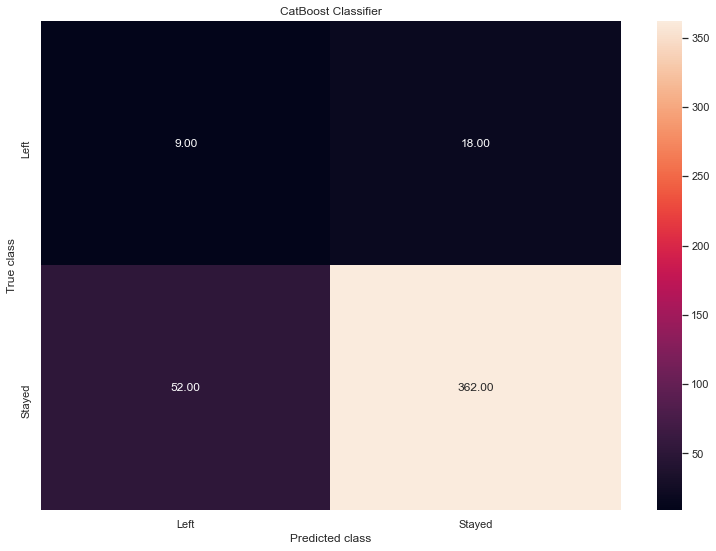

In [68]:
# Confusion matrix generation

cb_cm = metrics.confusion_matrix(predictions, y_test, [1,0])
sns.heatmap(cb_cm, annot=True, fmt='.2f',xticklabels = ["Left", "Stayed"] , yticklabels = ["Left", "Stayed"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('CatBoost Classifier')
plt.savefig('images/Confusion Matrix for CatBoost Classifier')

In [47]:
# Feature importance

feature_labels = np.array(['Age', 'Gender', 'MaritalStatus', 'DistanceFromHome', 
      'TotalWorkingYears', 'NumCompaniesWorked', 'MonthlyIncome', 'JobRole', 'YearsAtCompany',
      'YearsWithCurrManager', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'JobSatisfaction', 'EnvironmentSatisfaction',
      'RelationshipSatisfaction', 'WorkLifeBalance'])
importance = model.get_feature_importance(type= "FeatureImportance")
feature_indexes_by_importance = importance.argsort()
for index in feature_indexes_by_importance:
    print('{}-{:.2f}%'.format(feature_labels[index], (importance[index])))

WorkLifeBalance-3.60%
YearsAtCompany-3.95%
Gender-4.01%
YearsWithCurrManager-4.61%
YearsSinceLastPromotion-4.72%
YearsInCurrentRole-5.05%
TotalWorkingYears-5.34%
RelationshipSatisfaction-5.66%
JobSatisfaction-6.80%
EnvironmentSatisfaction-6.96%
DistanceFromHome-7.08%
NumCompaniesWorked-7.21%
JobRole-7.74%
Age-9.00%
MonthlyIncome-9.10%
MaritalStatus-9.16%


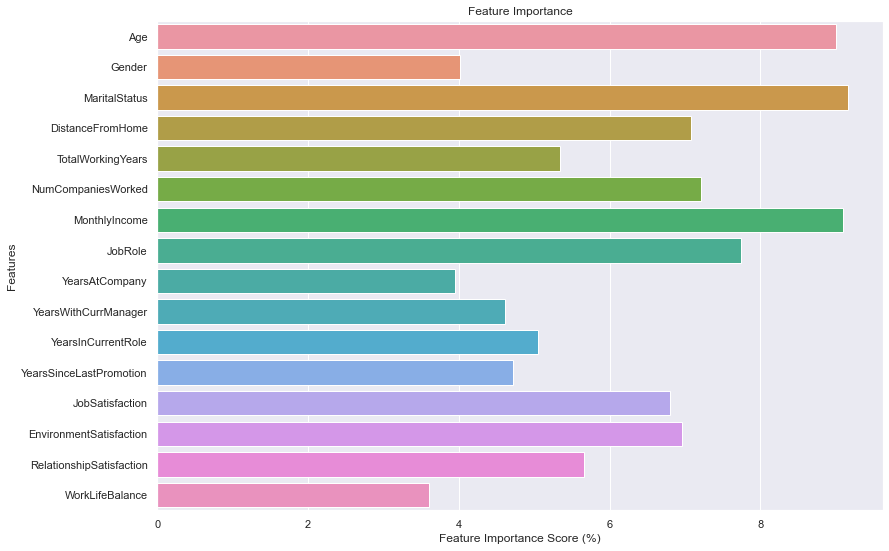

In [48]:
# Creating a bar plot for feature importance
sns.set(rc={'figure.figsize':(13,9)})
sns.barplot(x=importance, y=feature_labels)

# Adding labels
plt.xlabel('Feature Importance Score (%)')
plt.ylabel('Features')
plt.title("Feature Importance")

# Displaying the plot
plt.savefig('images/Feature Importance for CatBoost Classifier')
plt.show()

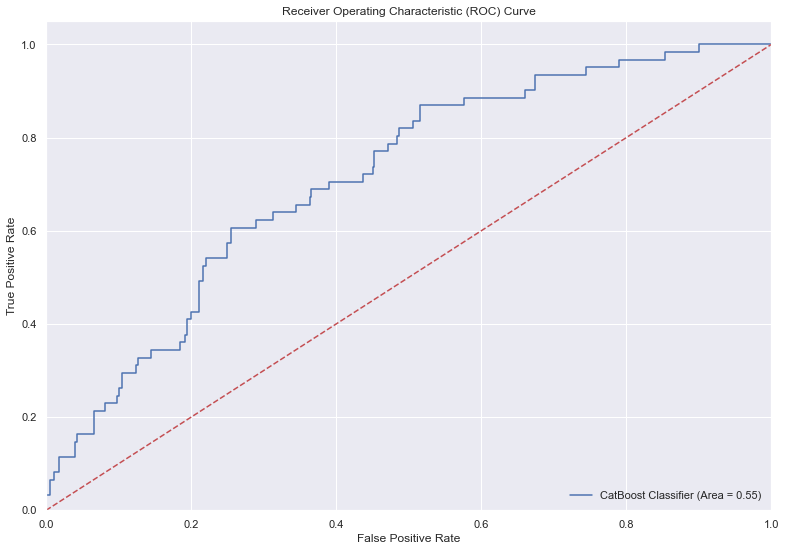

In [57]:
# Receiver Operating Characteristic (ROC) Curve generation

get_roc_curve = roc_auc_score(y_test, predictions)
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='CatBoost Classifier (Area = %0.2f)' % get_roc_curve)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.savefig('images/Receiver Operating Characteristic (ROC) Curve')
plt.show()

In [50]:
import pickle
pickle.dump(model, open('model.pkl','wb'))